# inference emotion 

In [1]:
import cv2
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

from utils.dataset import get_labels
from utils.inference import detect_faces
from utils.inference import draw_text
from utils.inference import draw_bounding_box
from utils.inference import apply_offsets
from utils.inference import load_detection_model
from utils.inference import load_image
from utils.preprocessor import preprocess_input

Using TensorFlow backend.


In [2]:
# parameters for loading data and images
image_path = './img/test_image.jpg'
detection_model_path = './datasets/haarcascade_frontalface_default.xml'
emotion_model_path = './datasets/fer2013_mini_XCEPTION.71-0.65.hdf5'
emotion_labels = get_labels('fer2013')
font = cv2.FONT_HERSHEY_SIMPLEX

In [3]:
# hyper-parameters for bounding boxes shape
emotion_offsets = (20, 40)
emotion_offsets = (0, 0)

In [4]:
# loading models
face_detection = load_detection_model(detection_model_path)
emotion_classifier = load_model(emotion_model_path, compile=False)

In [5]:
# getting input model shapes for inference
emotion_target_size = emotion_classifier.input_shape[1:3]

In [6]:
# loading images
rgb_image = load_image(image_path, grayscale=False)
gray_image = load_image(image_path, grayscale=True)
gray_image = np.squeeze(gray_image)
gray_image = gray_image.astype('uint8')

In [7]:
faces = detect_faces(face_detection, gray_image)
for face_coordinates in faces:
    x1, x2, y1, y2 = apply_offsets(face_coordinates, emotion_offsets)
    gray_face = gray_image[y1:y2, x1:x2]

    try:
        gray_face = cv2.resize(gray_face, (emotion_target_size))
    except:
        continue

    gray_face = preprocess_input(gray_face, True)
    gray_face = np.expand_dims(gray_face, 0)
    gray_face = np.expand_dims(gray_face, -1)
    emotion_label_arg = np.argmax(emotion_classifier.predict(gray_face))
    emotion_text = emotion_labels[emotion_label_arg]

    color = (255, 0, 0)
    draw_bounding_box(face_coordinates, rgb_image, color)
    draw_text(face_coordinates, rgb_image, emotion_text, color, 0, -20, 1, 2)

In [8]:
bgr_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2BGR)
cv2.imwrite('./datasets/result_test_image.jpg', bgr_image)

True

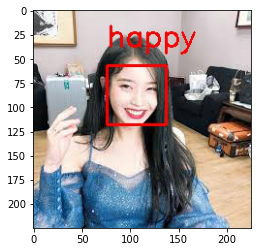

In [9]:
image = img.imread('./datasets/result_test_image.jpg')
plt.imshow(image)
plt.show()